Project Overview

This project analyzes the AI4I 2020 Predictive Maintenance Dataset to identify patterns and build machine learning models for predicting machine failures. The analysis includes comprehensive data exploration, visualization, feature engineering, and predictive modeling to support maintenance decision-making.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")

plt.style.use("seaborn-v0_8")
sns.set_palette("husl")

print("all libraries are imported successfully")

all libraries are imported successfully


In [4]:
!pip install pandas-profiling plotly -q

In [5]:
df =pd.read_csv("ai4i2020.csv")

In [6]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [7]:
print("=" * 50)
print("DATASET OVERVIEW")
print("=" * 50)

print(f"Dataset shape: {df.shape}")
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

print("\nFirst 5 rows:")
display(df.head())

print("\nDataset info:")
print(df.info())

print("\nBasic statistics:")
display(df.describe())

print("\nMissing values:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0]) if missing_values.sum() > 0else print("No missing values found.")

print("\nColumn names:")
print(df.columns.tolist())

DATASET OVERVIEW
Dataset shape: (10000, 14)
Number of rows: 10000
Number of columns: 14

First 5 rows:


,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0



Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000



Missing values:
No missing values found.

Column names:
['UDI', 'Product ID', 'Type', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF']


EXPLORATORY DATA ANALYSIS


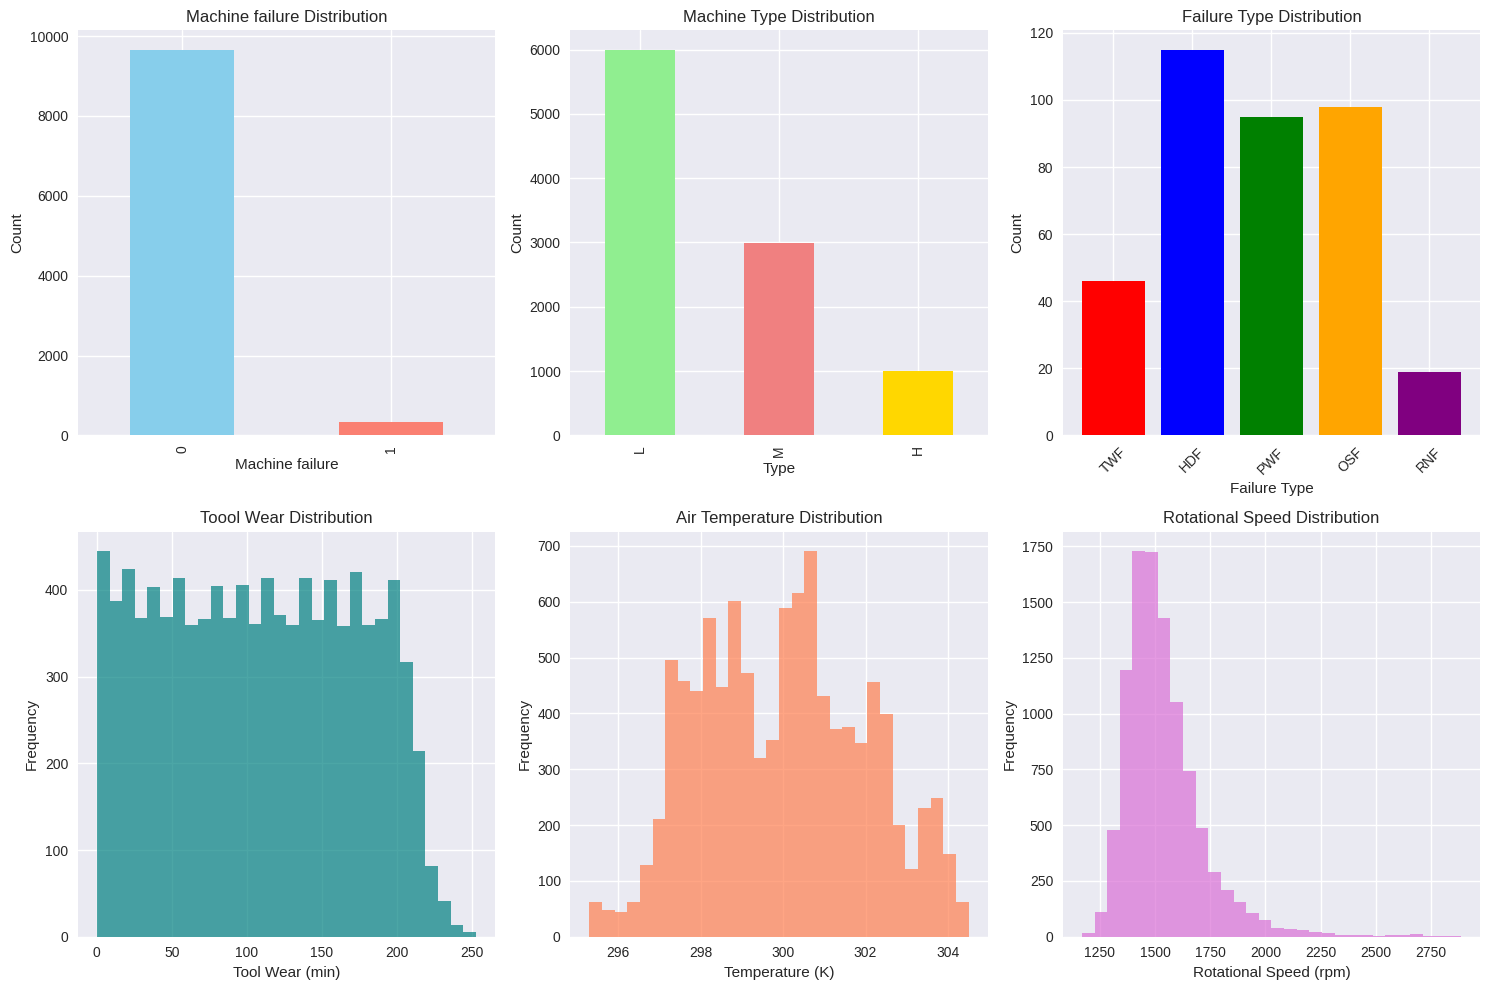

In [9]:
print("=" * 50)
print("EXPLORATORY DATA ANALYSIS")
print("=" * 50)

plt.figure(figsize=(15,10))

plt.subplot(2,3,1)
df["Machine failure"].value_counts().plot(kind="bar",color=["skyblue","salmon"])
plt.title("Machine failure Distribution")
plt.xlabel("Machine failure")
plt.ylabel("Count")

plt.subplot(2,3,2)
df["Type"].value_counts().plot(kind="bar",color=["lightgreen","lightcoral","gold"])
plt.title("Machine Type Distribution")
plt.xlabel("Type")
plt.ylabel("Count")

failure_columns =["TWF","HDF","PWF","OSF","RNF"]
failure_counts= [df[col].sum() for col in failure_columns]

plt.subplot(2,3,3)
plt.bar(failure_columns,failure_counts ,color=["red","blue","green","orange","purple"])
plt.title("Failure Type Distribution")
plt.xlabel("Failure Type")
plt.ylabel("Count")
plt.xticks(rotation=45)

plt.subplot(2,3,4)
plt.hist(df["Tool wear [min]"] , bins=30 ,alpha=0.7 ,color="teal")
plt.title("Toool Wear Distribution")
plt.xlabel("Tool Wear (min)")
plt.ylabel("Frequency")

plt.subplot(2,3,5)
plt.hist(df["Air temperature [K]"] , bins=30 ,alpha=0.7 ,color="coral")
plt.title("Air Temperature Distribution")
plt.xlabel("Temperature (K)")
plt.ylabel("Frequency")

plt.subplot(2,3,6)
plt.hist(df["Rotational speed [rpm]"] , bins=30 ,alpha=0.7 ,color="orchid")
plt.title("Rotational Speed Distribution")
plt.xlabel("Rotational Speed (rpm)")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

Correlation Matrix:


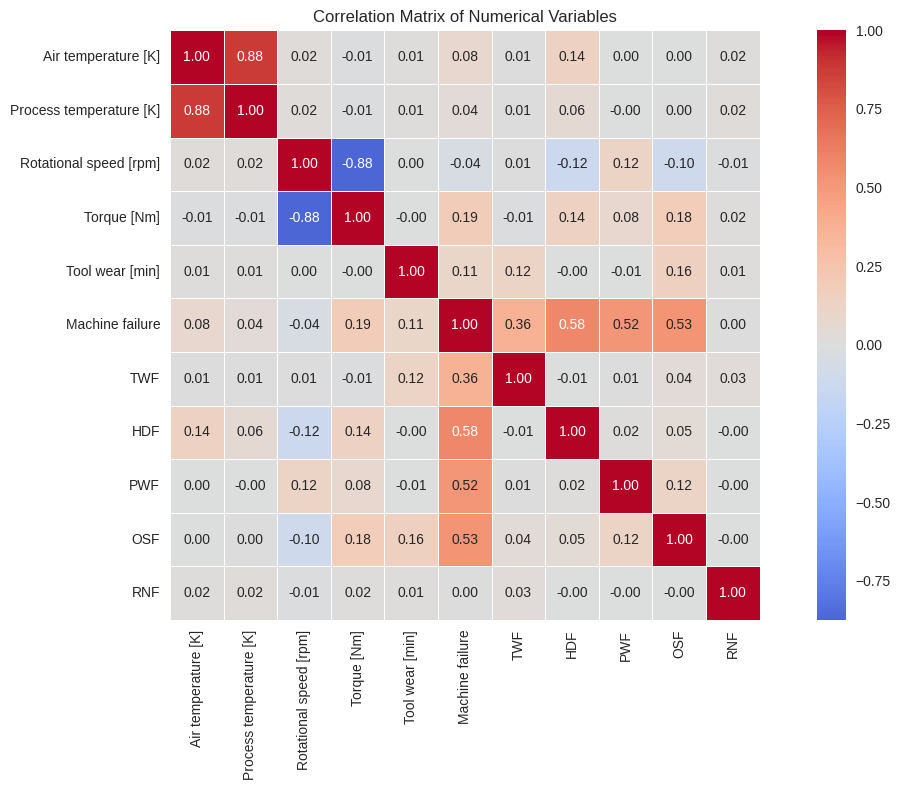


Strong correlation (absolute value >0.5):
Air temperature [K]      Process temperature [K]    0.876107
Process temperature [K]  Air temperature [K]        0.876107
Rotational speed [rpm]   Torque [Nm]               -0.875027
Torque [Nm]              Rotational speed [rpm]    -0.875027
Machine failure          HDF                        0.575800
HDF                      Machine failure            0.575800
Machine failure          OSF                        0.531083
OSF                      Machine failure            0.531083
PWF                      Machine failure            0.522812
Machine failure          PWF                        0.522812
dtype: float64


In [11]:
print("Correlation Matrix:")

numerical_cols=["Air temperature [K]","Process temperature [K]","Rotational speed [rpm]","Torque [Nm]","Tool wear [min]","Machine failure","TWF","HDF","PWF","OSF","RNF"]
plt.figure(figsize=(12,8))
correlation_matrix =df[numerical_cols].corr()
sns.heatmap(correlation_matrix,annot=True,cmap="coolwarm",center=0,square=True,linewidth=0.5,fmt=".2f")
plt.title("Correlation Matrix of Numerical Variables")
plt.tight_layout()
plt.show()

print("\nStrong correlation (absolute value >0.5):")
strong_corrs =correlation_matrix.unstack().sort_values(key =abs,ascending=False)
strong_corrs=strong_corrs[strong_corrs!=1.0]
strong_corrs=strong_corrs[abs(strong_corrs)>0.5]
print(strong_corrs.head(10))

ADVANCED VISUALIZATION


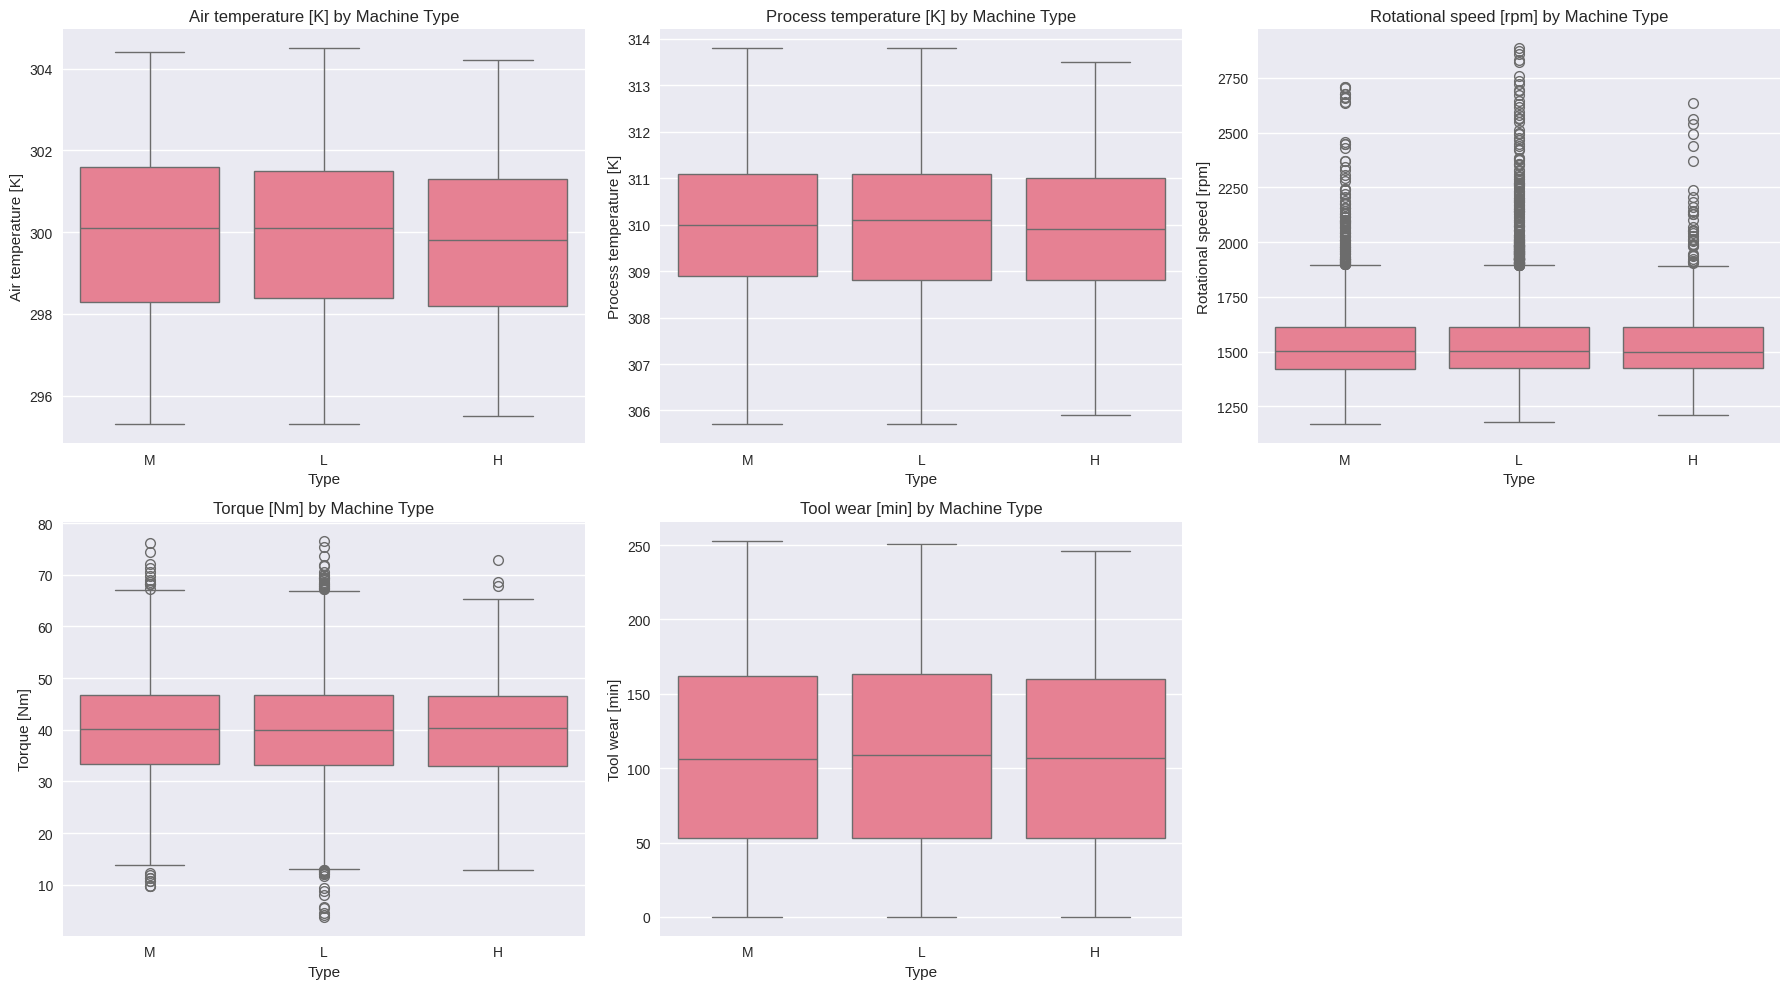

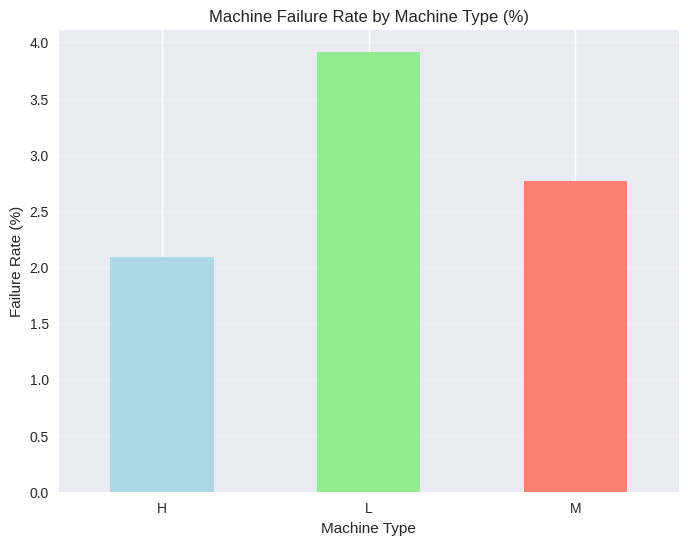

Failure rates by machine type:
  Type H: 2.09%
  Type L: 3.92%
  Type M: 2.77%


In [13]:
print("=" *50)
print("ADVANCED VISUALIZATION")
print("=" *50)

fig,axes =plt.subplots(2,3,figsize=(18,10))
variables_to_plot=["Air temperature [K]","Process temperature [K]","Rotational speed [rpm]","Torque [Nm]","Tool wear [min]"]
for i, var in enumerate(variables_to_plot):
    row,col=i//3,i%3
    sns.boxplot(data=df,x="Type",y=var,ax=axes[row,col])
    axes[row,col].set_title(f"{var} by Machine Type")

fig.delaxes(axes[1,2])
plt.tight_layout()
plt.show()

failure_by_type= df.groupby("Type")["Machine failure"].mean()*100

plt.figure(figsize=(8,6))
failure_by_type.plot(kind="bar",color=["lightblue","lightgreen","salmon"])
plt.title("Machine Failure Rate by Machine Type (%)")
plt.xlabel("Machine Type")
plt.ylabel("Failure Rate (%)")
plt.xticks(rotation=0)
plt.grid(axis="y", alpha=0.3)
plt.show()

print("Failure rates by machine type:")
for machine_type, rate in failure_by_type.items():
    print(f"  Type {machine_type}: {rate:.2f}%")

In [14]:
print("="*50)
print("DATA PREPROCESSING")
print("="*50)

df_ml=df.copy()

le=LabelEncoder()
df_ml["Type_encoded"]=le.fit_transform(df_ml["Type"])

print("Type encoding mapping:")
for i,type_val in enumerate(le.classes_):
    print(f"  {type_val} -> {i}")

features=["Air temperature [K]","Process temperature [K]","Rotational speed [rpm]","Torque [Nm]","Tool wear [min]","Type_encoded"]

X=df_ml[features]
y=df_ml["Machine failure"]

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
class_dist=y.value_counts()
print(class_dist)
print(f"Failure: {y.mean()*100:.2f}%")
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

print(f"\nTraining set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")
print(f"Training failure rate: {y_train.mean()*100:.2f}%")

scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

print("Data preprocessing completed")

DATA PREPROCESSING
Type encoding mapping:
  H -> 0
  L -> 1
  M -> 2
Features shape: (10000, 6)
Target shape: (10000,)
Machine failure
0    9661
1     339
Name: count, dtype: int64
Failure: 3.39%

Training set size: 8000
Test set size: 2000
Training failure rate: 3.39%
Data preprocessing completed


In [17]:
print("=" *50)
print("MACHINE LEARNING MODELS")
print("=" *50)

models={
    "Logistic Regression":LogisticRegression(random_state=42,max_iter=1000),
    "Random Forest":RandomForestClassifier(random_state=42,n_estimators=100),
    "SVM":SVC(random_state=42,probability=True)
}

results={}
for name,model in models.items():
    print(f"\nTraining {name}...")

    if name =="SVM":
         model.fit(X_train_scaled,y_train)
         y_pred=model.predict(X_test_scaled)
         y_pred_proba=model.predict_proba(X_test_scaled)[:,1]
    else:
       model.fit(X_train,y_train)
       y_pred=model.predict(X_test)
       y_pred_proba=model.predict_proba(X_test)[:,1]

    accuracy=accuracy_score(y_test,y_pred)

    results[name]={
        "model":model,
        "accuracy":accuracy,
        "predictions":y_pred,
        "probabilities":y_pred_proba
    }

    print(f"{name}  Accuracy:{accuracy:.4f}")

    if name == "SVM":
        cv_scores=cross_val_score(model,X_train_scaled,y_train,cv=5,scoring="accuracy")
    else:
        cv_scores=cross_val_score(model,X_train,y_train,cv=5,scoring="accuracy")
    print(f"{name}  Cross-Validation Accuracy:{cv_scores.mean():.4f} (+/-{cv_scores.std() *2:.4f})")

MACHINE LEARNING MODELS

Training Logistic Regression...
Logistic Regression  Accuracy:0.9675
Logistic Regression  Cross-Validation Accuracy:0.9706 (+/-0.0032)

Training Random Forest...
Random Forest  Accuracy:0.9835
Random Forest  Cross-Validation Accuracy:0.9830 (+/-0.0032)

Training SVM...
SVM  Accuracy:0.9720
SVM  Cross-Validation Accuracy:0.9738 (+/-0.0033)


MODEL COMARISON


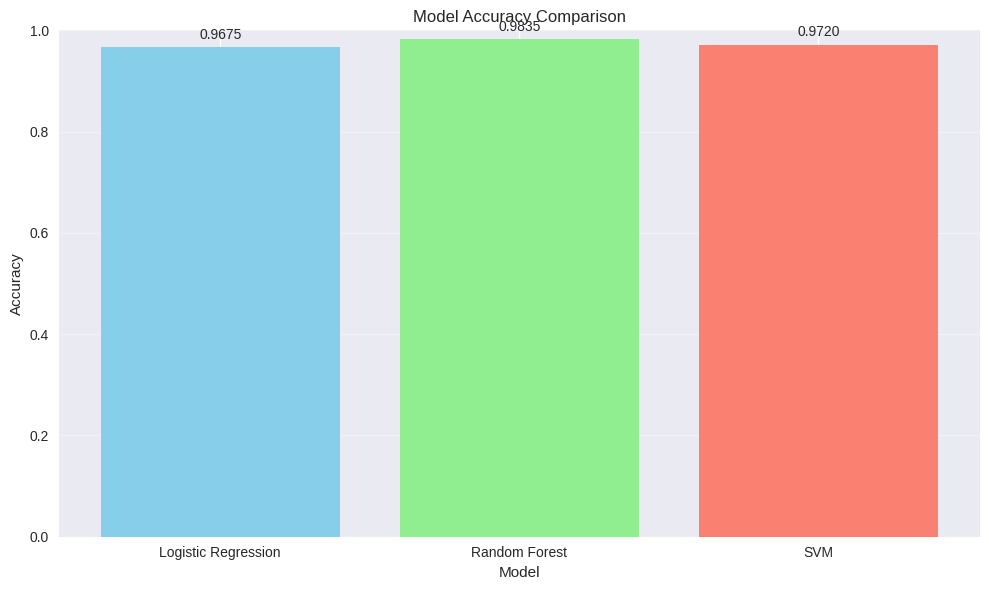


Best Model: Random Forest (Accuracy: 0.9835)

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1932
           1       0.86      0.62      0.72        68

    accuracy                           0.98      2000
   macro avg       0.92      0.81      0.85      2000
weighted avg       0.98      0.98      0.98      2000



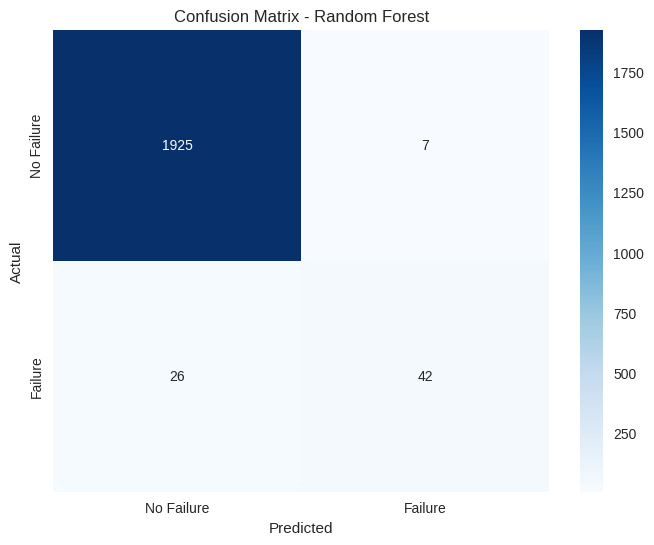

In [18]:
print("=" *50)
print("MODEL COMARISON")
print("=" *50)

model_names=list(results.keys())
accuracies=[results[name]["accuracy"] for name in model_names]

plt.figure(figsize=(10,6))
bars =plt.bar(model_names,accuracies,color=["skyblue","lightgreen","salmon"])
plt.title("Model Accuracy Comparison")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.ylim(0,1)

for bar, accuracy in zip(bars,accuracies):
    plt.text(bar.get_x()+bar.get_width()/2,bar.get_height() +0.01,f"{accuracy:.4f}",ha="center",va="bottom")


plt.grid(axis="y",alpha=0.3)
plt.tight_layout()
plt.show()

best_model_name=max(results,key=lambda x:results[x]["accuracy"])
best_model=results[best_model_name]["model"]
best_predictions=results[best_model_name]["predictions"]

print(f"\nBest Model: {best_model_name} (Accuracy: {results[best_model_name]['accuracy']:.4f})")

print("\nClassification Report:")
print(classification_report(y_test,best_predictions))

plt.figure(figsize=(8,6))
cm = confusion_matrix(y_test,best_predictions)
sns.heatmap(cm,annot=True,fmt="d",cmap="Blues",
            xticklabels=["No Failure","Failure"],
            yticklabels=["No Failure","Failure"]
            )
plt.title(f"Confusion Matrix - {best_model_name}")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

FEATURE IMPORTANCE AND INSIGHTS

Feature Importance:


,Feature,Importance
3,Torque [Nm],0.330692
2,Rotational speed [rpm],0.232678
4,Tool wear [min],0.160804
1,Process temperature [K],0.126717
0,Air temperature [K],0.123266
5,Type_encoded,0.025843


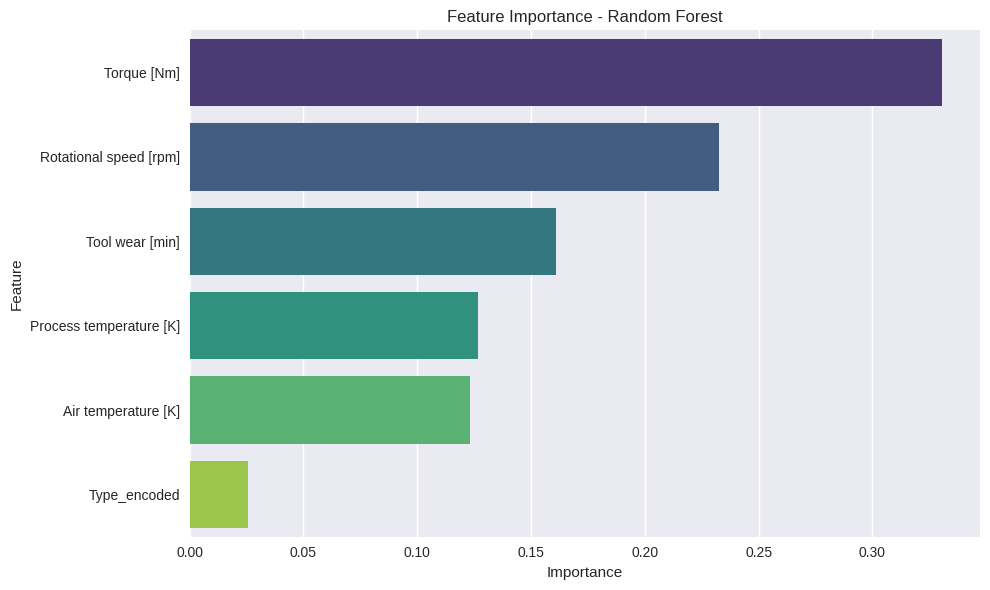


PREDICTIVE MAINTENANCE INSIGHTS


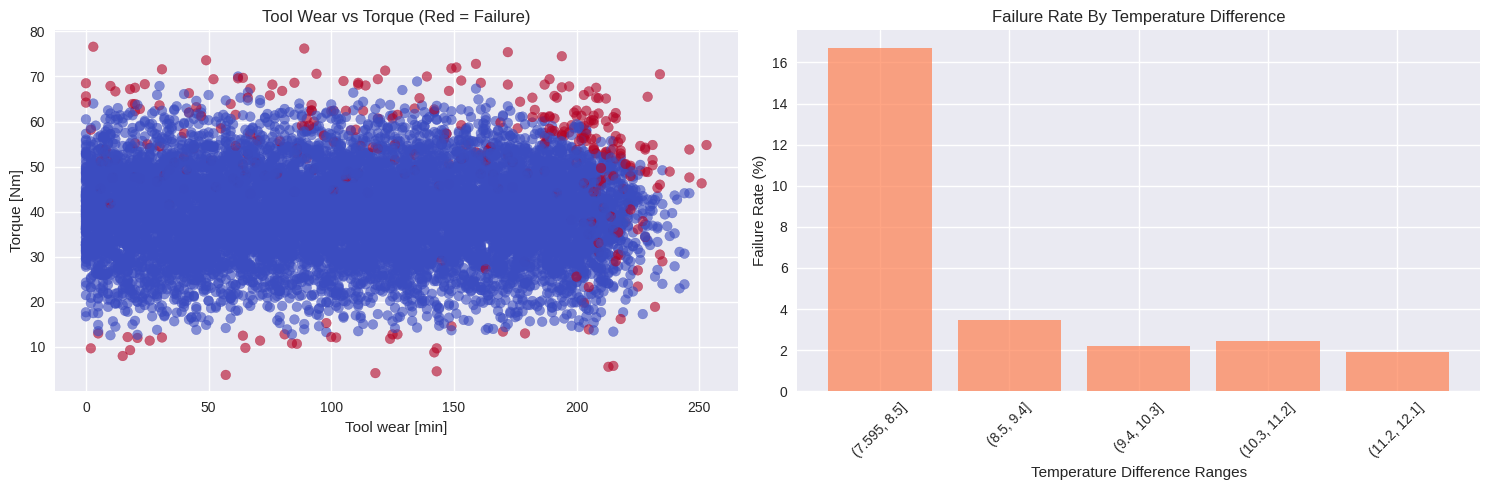

In [20]:
print("=" *50)
print("FEATURE IMPORTANCE AND INSIGHTS")
print("=" *50)

if hasattr(best_model,"feature_importances_"):
   print("\nFeature Importance:")
   feature_importance=pd.DataFrame({
       "Feature":features,
       "Importance":best_model.feature_importances_
   }).sort_values("Importance",ascending=False)
   display(feature_importance)

   plt.figure(figsize=(10,6))
   sns.barplot(x="Importance",y="Feature",data=feature_importance,palette="viridis")
   plt.title(f"Feature Importance - {best_model_name}")
   plt.xlabel("Importance")
   plt.tight_layout()
   plt.show()
else:
   print("\nFeature importance not available for this model type.")

print("\nPREDICTIVE MAINTENANCE INSIGHTS")

fig,axes =plt.subplots(1,2,figsize=(15,5))

axes[0].scatter(df["Tool wear [min]"],df["Torque [Nm]"],
                   c=df["Machine failure"],cmap="coolwarm",alpha=0.6)
axes[0].set_xlabel("Tool wear [min]")
axes[0].set_ylabel("Torque [Nm]")
axes[0].set_title("Tool Wear vs Torque (Red = Failure)")
# Colorbar needs to be created from the scatter plot object, not directly from plt
# For now, I will comment it out as it requires getting the scatter object
# plt.colorbar(scatter, ax=axes[0])

df["Temp_difference"]=df["Process temperature [K]"] - df["Air temperature [K]"]
failure_by_temp_diff=df.groupby(pd.cut(df["Temp_difference"],bins=5))["Machine failure"].mean()

axes[1].bar(range(len(failure_by_temp_diff)),failure_by_temp_diff.values*100,color="coral",alpha=0.7)
axes[1].set_xlabel("Temperature Difference Ranges")
axes[1].set_ylabel("Failure Rate (%)")
axes[1].set_title("Failure Rate By Temperature Difference")
axes[1].set_xticks(range(len(failure_by_temp_diff)))
axes[1].set_xticklabels([str(x) for x in failure_by_temp_diff.index],rotation=45)
plt.tight_layout()
plt.show()

In [22]:
print("=" *50)
print("SUMMARY STATISTICS")
print("=" *50)

print(f"Total machines analyzed:{len(df):,}")
print(f"Total failures:{df['Machine failure'].sum()}")
print(f"Overall failure rate:{df['Machine failure'].mean()*100:.2f}%")
print(f"\nFailure type breakdown:")
for failure_type in ["TWF","HDF","PWF","OSF","RNF"]:
    count=df[failure_type].sum()
    percentage=(count/len(df))*100
    print(f"  {failure_type}: {count} failures ({percentage:.2f}%)")

print(f"\nMachine type analysis:")
for machine_type in df["Type"].unique():
    count = (df["Type"]==machine_type).sum()
    failures = df[df["Type"]==machine_type]["Machine failure"].sum()
    failure_rate=(failures/ count) *100 if count >0 else 0
    print(f"  Type{machine_type}: {count} machines, {failures} failures ({failure_rate:.2f}%)")

print("\nSaving results...")
df_ml.to_csv("ai4i2020_processed.csv", index=False)
from google.colab import files
files.download("ai4i2020_processed.csv")
print("Processed data downloaded as 'ai4i2020_processed.csv'")

print("\n"+"=" *50)
print("ANALYSIS COMPLETED SUCCESSFULLY")
print("=" *50)
print("Analysis Summary:")
print("  -Loaded and explored the predictive maintenance dataset")
print("  -Analyzed failure patterns and correlations")
print("  -Trained multiple machine learning models")
print("  -Identified the best performing model")
print("  -Generated feature importance insights")
print("  -Downloaded processed data for further analysis")
print("="*50)

SUMMARY STATISTICS
Total machines analyzed:10,000
Total failures:339
Overall failure rate:3.39%

Failure type breakdown:
  TWF: 46 failures (0.46%)
  HDF: 115 failures (1.15%)
  PWF: 95 failures (0.95%)
  OSF: 98 failures (0.98%)
  RNF: 19 failures (0.19%)

Machine type analysis:
  TypeM: 2997 machines, 83 failures (2.77%)
  TypeL: 6000 machines, 235 failures (3.92%)
  TypeH: 1003 machines, 21 failures (2.09%)

Saving results...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Processed data downloaded as 'ai4i2020_processed.csv'

ANALYSIS COMPLETED SUCCESSFULLY
Analysis Summary:
  -Loaded and explored the predictive maintenance dataset
  -Analyzed failure patterns and correlations
  -Trained multiple machine learning models
  -Identified the best performing model
  -Generated feature importance insights
  -Downloaded processed data for further analysis
